In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df[df['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [5]:
df[df['Sex'] == 'male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [6]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [7]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [8]:
pd.crosstab(df['Survived'], df['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


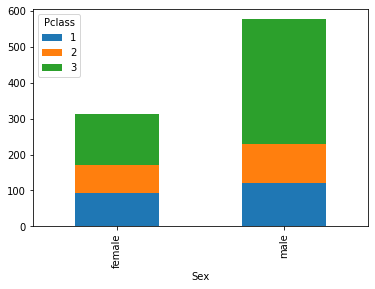

In [9]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

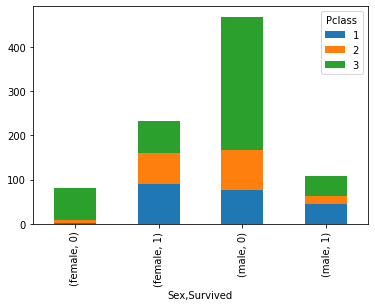

In [10]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

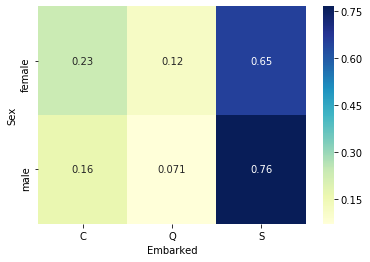

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize='index'), cmap='YlGnBu', annot=True)

# Combine Datasets in Pandas

In [12]:
adf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x2' : [1, 2, 3]})

bdf = pd.DataFrame(data={'x1': ['A', 'B', 'D'], 'x3' : ['T', 'F', 'T']})

In [13]:
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [25]:
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [14]:
pd.merge(adf, bdf, how='left')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [15]:
pd.merge(adf, bdf, how='right')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [17]:
# What is common
pd.merge(adf, bdf, how='inner')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [20]:
# Same as above
pd.merge(adf, bdf)

,x1,x2,x3
0,A,1,T
1,B,2,F


In [21]:
pd.merge(adf, bdf, how='outer')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [22]:
# Appending Pandas dataframe
pd.concat([adf, bdf], sort=True)

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,D,NaN,T


In [23]:
pd.concat([adf, bdf], axis=1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


In [25]:
cdf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x3' : ['T', 'F', 'T']})
pd.concat([adf, cdf], axis=1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,C,T


In [31]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

In [34]:
df = df.append(df2, ignore_index=True)
df.head(4)

,a,b
0,1,2
1,3,4
2,5,6
3,7,8


In [38]:
data = {'weekday': ["Monday", "Tuesday", "Wednesday",
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [37]:
melted = pd.melt(df, id_vars=['weekday'], var_name='Person', value_name='Score')
melted

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


In [39]:
import numpy as np

df = pd.DataFrame({'a': [1, 10, 8, 11, -1],'b': list('abdce'), 'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
df.nlargest(3, 'a')

,a,b,c
3,11,c,3.0
1,10,b,2.0
2,8,d,NaN
